In [64]:
from sklearn.model_selection import train_test_split
from Callbacks import Callbacks
from Config import Config
from folder_defs import get_logdir
from train_model import train_model
from build_model import build_model
from save_model import save_model
import numpy as np
import scipy.io as sio
import os
from PIL import Image
import matplotlib.pyplot as plt
import time

In [2]:
print('Beginning program')

# constants
epoch_iter = 1
max_epochs = 2
model_iter = 1
batch_size = 100
batch_size_increase_multiplier = 2

Beginning program


In [3]:
# get config
configuration = Config()
config = configuration.config

unparsed: ['-f', '/Users/Yacalis/Library/Jupyter/runtime/kernel-2fe89685-8111-4bd6-ad6c-a4e815548116.json']


In [4]:
# set up callbacks
log_dir = get_logdir(config)
callbacks = Callbacks(config, log_dir).callbacks

In [5]:
# being the process of retrieving the data
project_dir = '/Users/Yacalis/Projects/TensorFlow/cs274c-data/'
imdb_mat = project_dir + "/imdb.mat"

In [6]:
# loading file into memory
sio.whosmat(imdb_mat)
f = sio.loadmat(imdb_mat)

In [7]:
# getting the important bit of the file
data = f['imdb'][0][0]
num_entries = len(data[2][0])

In [8]:
# turning the array into a dict of key:filename, value:gender
filename_gender_dict = {}
for i in range(num_entries):
    key = str(data[2][0][i][0])
    value = data[3][0][i]
    filename_gender_dict[key] = value 

In [62]:
# set images dir
images_dir = project_dir + 'images/copy'
images_os_dir = os.listdir(images_dir)

In [65]:
# instantiate arrays
x_data = []
y_data = []

# might not work, for whatever reason
try:
    for sub_dir in images_os_dir:
        filepath = os.path.join(images_dir, sub_dir)
        # make sure only directories
        if os.path.isdir(filepath):
            print(filepath)
            for file in os.listdir(filepath):
                # get y_data
                key = os.path.join(sub_dir, file)
                value = filename_gender_dict[key]
                # make sure y_data is a correct number
                if value == 1.0 or value == 0.0:
                    # get x_data
                    filename = os.path.join(filepath, file)
                    im = Image.open(filename)
                    im_arr = np.array(im.resize((228, 228)))
                    im.close()
                    # make sure x_data is correct shape
                    if im_arr.shape == (228, 228, 3):
                        # now that we know y_data and x_data are OK
                        x_data.append(im_arr)
                        if value == 1.0:
                            y_data.append(np.array([0, 1]))
                        else:
                            y_data.append(np.array([1, 0]))
except Exception as e:
        print(str(e))
print(len(x_data))
print(x_data[0].shape)
x_data = np.array(x_data)
y_data = np.array(y_data)

/Users/Yacalis/Projects/TensorFlow/cs274c-data/images/copy/00
/Users/Yacalis/Projects/TensorFlow/cs274c-data/images/copy/01
/Users/Yacalis/Projects/TensorFlow/cs274c-data/images/copy/02
/Users/Yacalis/Projects/TensorFlow/cs274c-data/images/copy/03
/Users/Yacalis/Projects/TensorFlow/cs274c-data/images/copy/04
/Users/Yacalis/Projects/TensorFlow/cs274c-data/images/copy/05
/Users/Yacalis/Projects/TensorFlow/cs274c-data/images/copy/06
/Users/Yacalis/Projects/TensorFlow/cs274c-data/images/copy/07
/Users/Yacalis/Projects/TensorFlow/cs274c-data/images/copy/08
/Users/Yacalis/Projects/TensorFlow/cs274c-data/images/copy/09
/Users/Yacalis/Projects/TensorFlow/cs274c-data/images/copy/10
/Users/Yacalis/Projects/TensorFlow/cs274c-data/images/copy/11
'11/nm0180411_rm2809108736_1982-8-7_2006 - Copy.jpg'
23943
(228, 228, 3)


(23943, 228, 228, 3) (23943, 2)


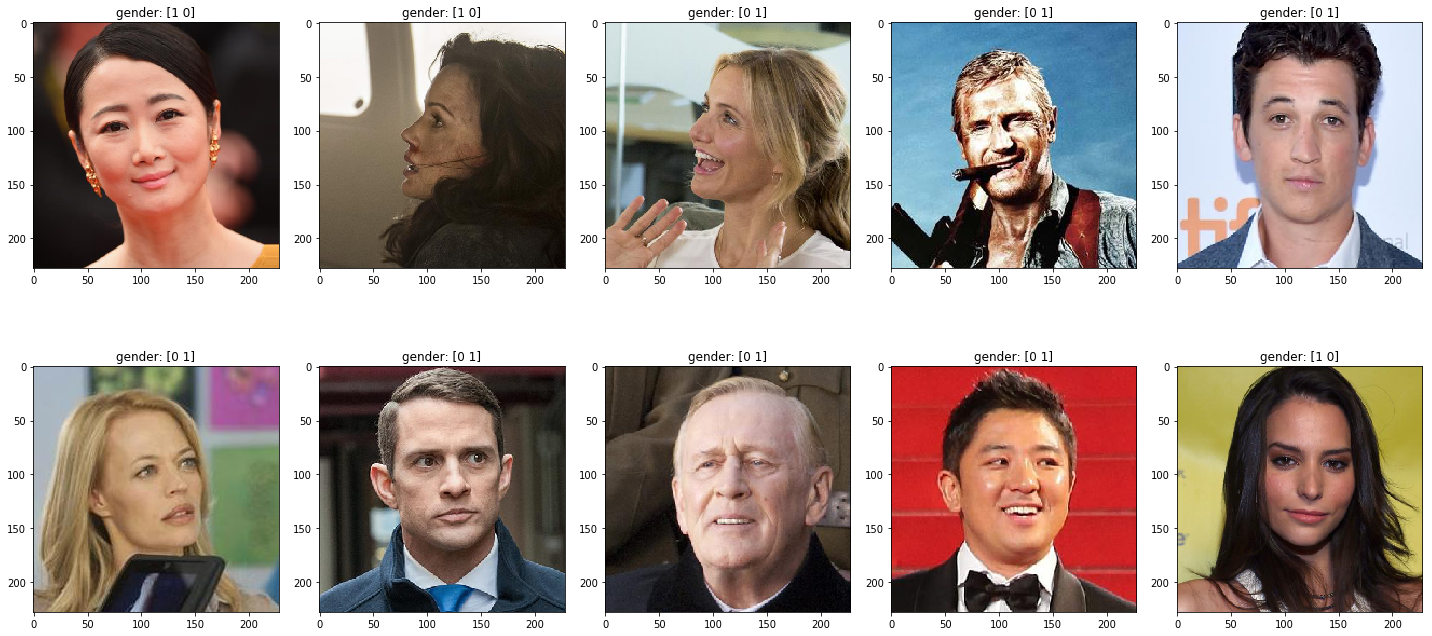

In [66]:
# make sure this all worked
print(x_data.shape, y_data.shape)
plt.figure(figsize=(20,10))
columns = 5
k = 0
max_iter = 9
while k < (max_iter + 1):
    rando = np.random.randint(0, len(x_data) - 1)
    image = x_data[rando]
    plt.subplot((max_iter - 1) / columns + 1, columns, k + 1)
    plt.title(f'gender: {y_data[rando]}')
    plt.imshow(image)
    k += 1
plt.tight_layout()

In [67]:
# get input data dim
input_dim = x_data[0].shape
print(input_dim)

(228, 228, 3)


In [33]:
# split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2)

In [34]:
config.optimizer = 'adam'

In [35]:
# build model
model = build_model(input_dim, config)

Building model...
Compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 56, 56, 96)        14208     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 

In [36]:
# train model
model, epoch_iter = train_model(model, x_train, y_train, model_iter, batch_size,
                                config, callbacks, epoch_iter, max_epochs)

Training model 1 at epoch 1, batch size is 100
Train on 5494 samples, validate on 1374 samples
Epoch 1/1
5494/5494 [==============================] - 568s 103ms/step - loss: 1.9576 - val_loss: 1.5770


In [37]:
# evaluate model
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Final score:', score)

1717/1717 [==============================] - 50s 29ms/step
Final score: 1.6675246005566509


[1 0] [[0.14284365 0.8571564 ]] 1.0
[0 1] [[0.07406439 0.9259356 ]] 1.0
[0 1] [[0.06373266 0.9362673 ]] 1.0
[0 1] [[0.10931745 0.8906826 ]] 1.0
[1 0] [[0.10853555 0.8914644 ]] 0.99999994
[1 0] [[0.25089604 0.74910396]] 1.0
[0 1] [[0.19011797 0.809882  ]] 0.99999994
[0 1] [[0.14508636 0.8549137 ]] 1.0000001
[0 1] [[0.01755327 0.9824468 ]] 1.0
[1 0] [[0.08627786 0.91372216]] 1.0


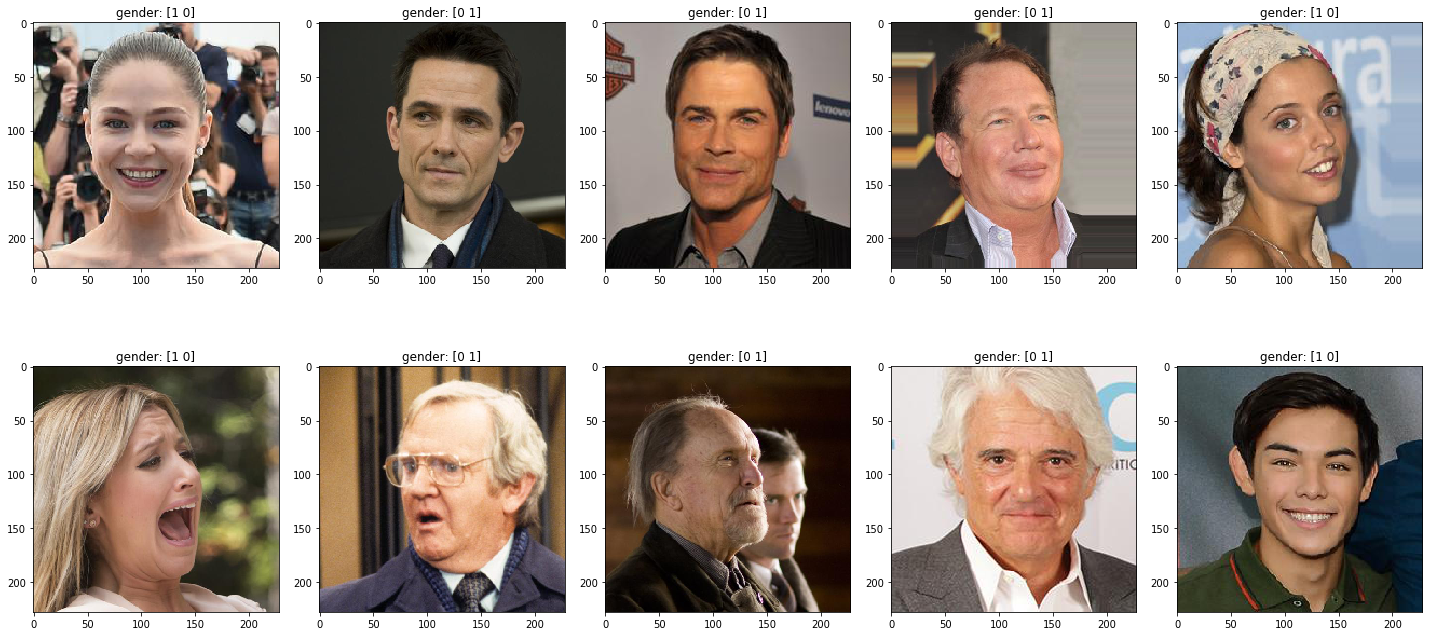

In [68]:
plt.figure(figsize=(20,10))
columns = 5
k = 0
max_iter = 9
while k < (max_iter + 1):
    rando = np.random.randint(0, len(x_data) - 1)
    image = x_data[rando]
    plt.subplot((max_iter - 1) / columns + 1, columns, k + 1)
    plt.title(f'gender: {y_data[rando]}')
    plt.imshow(image)
    pred = model.predict(np.expand_dims(x_data[rando], axis=0))
    print(y_data[rando], pred, np.sum(pred))
    k += 1
plt.tight_layout()

In [98]:
from folder_defs import get_logdir
import json
import time

In [99]:
# start saving model process
def save_config(config: object, logdir: str) -> None:
    param_path = os.path.join(logdir, 'params.json')
    with open(param_path, 'w') as f:
        json.dump(config.__dict__, f, indent=4, sort_keys=True)

In [100]:
def get_logdir(path: str, config: object) -> str:
    logdir = time.strftime('%m%d') + '_' + time.strftime('%H%M%S')
    logdir += '-changelr_' + str(config.change_lr)
    logdir += '-changebs_' + str(config.change_bs)
    if config.change_bs:
        logdir += '-batch_' + 'var'
    else:
        logdir += '-batch_' + str(config.batch_size)

    return os.path.join(path, 'logs', logdir)

In [101]:
logdir = get_logdir(project_dir, config)

In [102]:
try:
    os.makedirs(logdir)
    print('tried')
except:
    print('passed')
if not os.path.exists(logdir):
    print('no')
else:
    print('yes')

tried
yes


In [103]:
param_path = os.path.join(logdir, 'params.json')
with open(param_path, 'w+') as f:
    json.dump(config.__dict__, f, indent=4, sort_keys=True)

In [104]:
save_config(config, logdir)

In [105]:
model_fp = logdir + '/finished_model.hdf5'
model.save(model_fp)

In [106]:
weights_fp = logdir + '/finished_weights.hdf5'
model.save_weights(weights_fp)

In [107]:
np_weights_fp = logdir + '/np_finished_weights.txt'
weights = model.get_weights()
with open(np_weights_fp, 'w+') as file:
    for i in range(len(weights)):
        if i != len(weights) - 1:
            file.write('shape: ' + str(weights[i].shape) + '\n')
            file.write(str(weights[i]) + '\n')
        else:
            file.write('shape: ' + str(weights[i].shape) + '\n')
            file.write(str(weights[i]))

In [108]:
print('Completed program')

Completed program


In [52]:
print(np.sum(y_data[0]), len(y_data) - np.sum(y_data), len(y_data))

8585 0 8585


In [69]:
print('female: ', np.sum(y_data[:,0]))
print('male: ', np.sum(y_data[:,1]))

female:  10200
male:  13743
